# Exploration — database/personnes.csv

Ce notebook explore la table **personnes** (issues des trajectoires + ReID global).

Fichier: `database/personnes.csv`
Colonnes attendues: `person_id`, `key`, `first_seen_t_sync`, `last_seen_t_sync`, `first_camera`, `last_camera`, `cameras`, `tracks_count`, `frames_count`.

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path('../database/personnes.csv')
assert DATA_PATH.exists(), f'File not found: {DATA_PATH.resolve()}'

df = pd.read_csv(DATA_PATH)
df.shape, df.columns.tolist()

((39, 9),
 ['person_id',
  'key',
  'first_seen_t_sync',
  'last_seen_t_sync',
  'first_camera',
  'last_camera',
  'cameras',
  'tracks_count',
  'frames_count'])

In [3]:
# Quick overview
display(df.head(10))
display(df.describe(include='all').T)

# Basic quality checks
print('rows:', len(df))
print('unique keys:', df['key'].nunique() if 'key' in df.columns else None)
print('non-empty global person_id:', df['person_id'].astype(str).str.strip().replace('nan','').ne('').sum() if 'person_id' in df.columns else None)

,person_id,key,first_seen_t_sync,last_seen_t_sync,first_camera,last_camera,cameras,tracks_count,frames_count
0,1.0,global::1,6.100,1449.670,CAMERA_HALL_PORTE_DROITE,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,568,269290
1,2.0,global::2,6.100,1415.408,CAMERA_HALL_PORTE_DROITE,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEVANTURE_PORTE_ENTREE|CAMERA_DEVANTURE...,72,21373
2,3.0,global::3,134.360,1288.648,CAMERA_HALL_PORTE_DROITE,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,257,87859
3,4.0,global::4,200.441,1069.820,CAMERA_HALL_PORTE_DROITE,CAMERA_FIN_COULOIR_DROIT,CAMERA_FIN_COULOIR_DROIT|CAMERA_HALL_PORTE_DROITE,2,147
4,5.0,global::5,396.485,455.336,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1|CAMERA_...,2,153
5,6.0,global::6,415.563,1322.891,CAMERA_HALL_PORTE_DROITE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_ESCALIER_DEB...,4,355
6,7.0,global::7,451.100,1216.938,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_DEVANTURE_PORTE_ENTREE|CAMERA_FIN_COULO...,4,299
7,8.0,global::8,543.291,545.859,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2,1,74
8,9.0,global::9,648.140,1447.476,CAMERA_HALL_PORTE_GAUCHE,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,111,25210
9,10.0,global::10,660.692,663.252,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_DEVANTURE_PORTE_ENTREE,2,134


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_id,19.0,NaN,NaN,NaN,10.0,5.627314,1.0,5.5,10.0,14.5,19.0
key,39,39,global::1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_seen_t_sync,39.0,NaN,NaN,NaN,798.985256,391.635544,6.1,654.416,748.259,1024.861,1449.13
last_seen_t_sync,39.0,NaN,NaN,NaN,1080.055769,331.873955,223.424,788.7945,1133.533,1389.9835,1465.899
first_camera,39,11,CAMERA_DEVANTURE_PORTE_ENTREE,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_camera,39,10,CAMERA_DEVANTURE_PORTE_ENTREE,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cameras,39,22,CAMERA_DEVANTURE_PORTE_ENTREE,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tracks_count,39.0,NaN,NaN,NaN,29.666667,99.55145,1.0,1.0,1.0,3.0,568.0
frames_count,39.0,NaN,NaN,NaN,11036.230769,44961.192932,2.0,62.0,67.0,237.0,269290.0


rows: 39
unique keys: 39
non-empty global person_id: 19


In [4]:
# Coerce numeric columns
for c in ['first_seen_t_sync','last_seen_t_sync','tracks_count','frames_count']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Derived metrics
if {'first_seen_t_sync','last_seen_t_sync'}.issubset(df.columns):
    df['lifetime_sec'] = df['last_seen_t_sync'] - df['first_seen_t_sync']

if 'cameras' in df.columns:
    df['camera_count'] = df['cameras'].fillna('').apply(lambda s: len([x for x in str(s).split('|') if x]))

display(df.sort_values('frames_count', ascending=False).head(10) if 'frames_count' in df.columns else df.head(10))

,person_id,key,first_seen_t_sync,last_seen_t_sync,first_camera,last_camera,cameras,tracks_count,frames_count,lifetime_sec,camera_count
0,1.0,global::1,6.100,1449.670,CAMERA_HALL_PORTE_DROITE,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,568,269290,1443.570,11
2,3.0,global::3,134.360,1288.648,CAMERA_HALL_PORTE_DROITE,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,257,87859,1154.288,11
8,9.0,global::9,648.140,1447.476,CAMERA_HALL_PORTE_GAUCHE,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,111,25210,799.336,7
1,2.0,global::2,6.100,1415.408,CAMERA_HALL_PORTE_DROITE,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEVANTURE_PORTE_ENTREE|CAMERA_DEVANTURE...,72,21373,1409.308,9
11,12.0,global::12,680.109,1465.899,CAMERA_FIN_COULOIR_GAUCHE_ETAGE1,CAMERA_DEVANTURE_SOUS_ARBRE,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_PO...,62,13853,785.790,7
13,14.0,global::14,738.848,1440.826,CAMERA_FIN_COULOIR_DROIT,CAMERA_FIN_COULOIR_DROIT,CAMERA_FIN_COULOIR_DROIT|CAMERA_HALL_PORTE_GAUCHE,10,5583,701.978,2
12,13.0,global::13,716.941,1455.490,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_DEVANTURE_SO...,25,3859,738.549,5
10,11.0,global::11,678.560,1211.406,CAMERA_HALL_PORTE_ENTREE,CAMERA_DEBUT_COULOIR_DROIT,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_ESCALIER_DEB...,10,654,532.846,3
5,6.0,global::6,415.563,1322.891,CAMERA_HALL_PORTE_DROITE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE,CAMERA_DEBUT_COULOIR_DROIT|CAMERA_ESCALIER_DEB...,4,355,907.328,3
6,7.0,global::7,451.100,1216.938,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_DEVANTURE_PORTE_ENTREE|CAMERA_FIN_COULO...,4,299,765.838,3


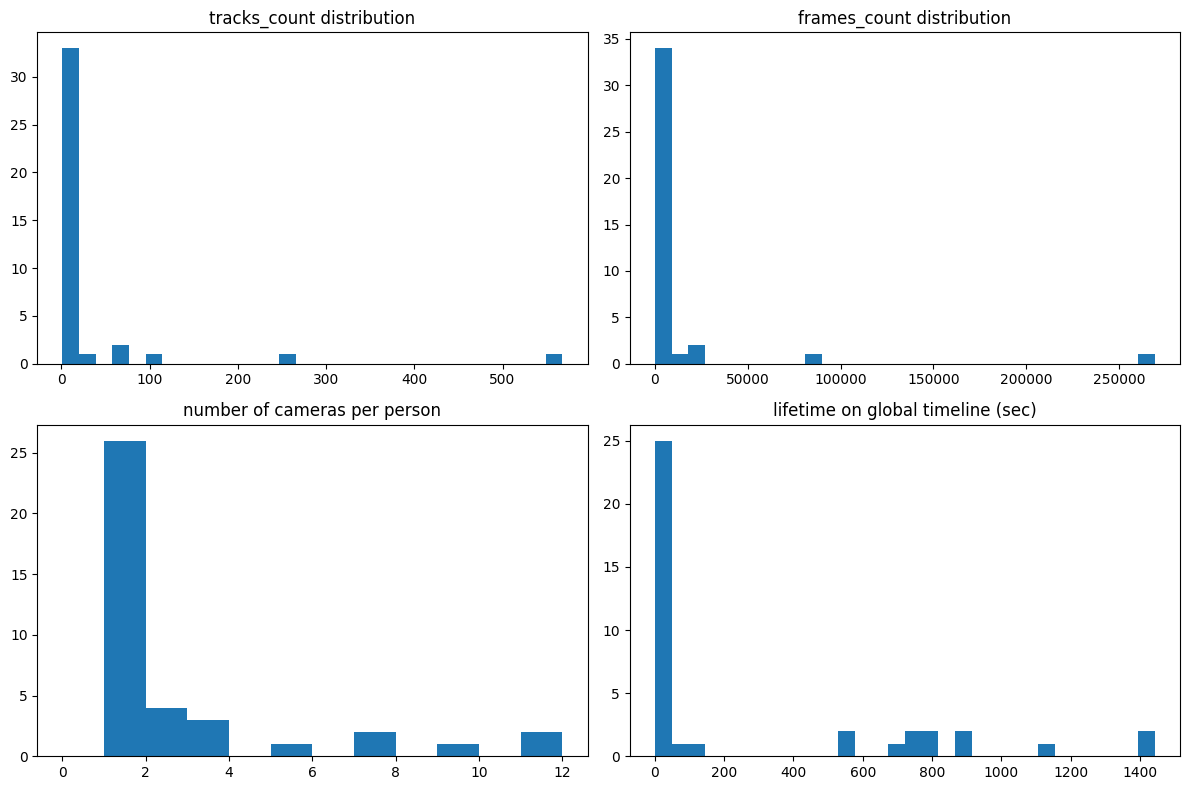

In [5]:
# Distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

if 'tracks_count' in df.columns:
    axes[0].hist(df['tracks_count'].dropna(), bins=30)
    axes[0].set_title('tracks_count distribution')

if 'frames_count' in df.columns:
    axes[1].hist(df['frames_count'].dropna(), bins=30)
    axes[1].set_title('frames_count distribution')

if 'camera_count' in df.columns:
    axes[2].hist(df['camera_count'].dropna(), bins=range(0, int(df['camera_count'].max() or 1) + 2))
    axes[2].set_title('number of cameras per person')

if 'lifetime_sec' in df.columns:
    axes[3].hist(df['lifetime_sec'].dropna(), bins=30)
    axes[3].set_title('lifetime on global timeline (sec)')

plt.tight_layout()
plt.show()

cameras
CAMERA_DEVANTURE_PORTE_ENTREE             14
CAMERA_FIN_COULOIR_DROIT                  11
CAMERA_HALL_PORTE_GAUCHE                  11
CAMERA_DEBUT_COULOIR_DROIT                10
CAMERA_DEVANTURE_SOUS_ARBRE                9
CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE       9
CAMERA_HALL_PORTE_ENTREE                   8
CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1     6
CAMERA_HALL_PORTE_DROITE                   6
CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2     5
CAMERA_FIN_COULOIR_GAUCHE_ETAGE1           4
Name: count, dtype: int64

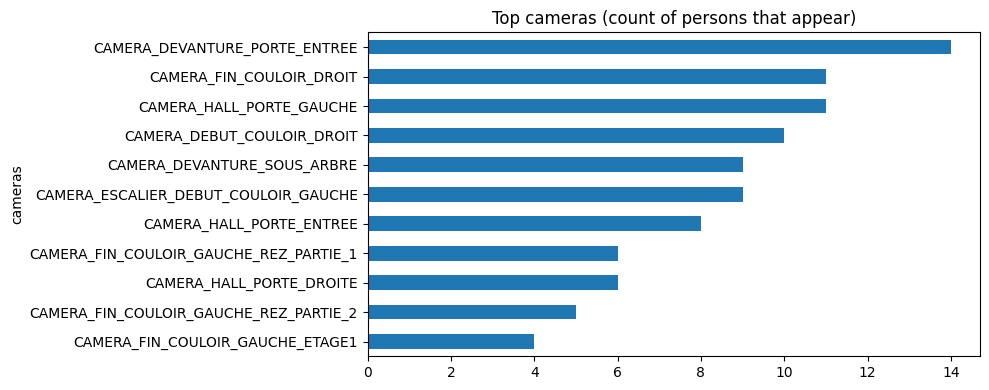

In [6]:
# Top cameras by appearances
if 'cameras' in df.columns:
    cam_counts = (
        df['cameras']
        .fillna('')
        .str.split('|')
        .explode()
        .replace('', np.nan)
        .dropna()
        .value_counts()
    )
    display(cam_counts.head(20))

    plt.figure(figsize=(10, 4))
    cam_counts.head(15).iloc[::-1].plot(kind='barh')
    plt.title('Top cameras (count of persons that appear)')
    plt.tight_layout()
    plt.show()